In [1]:
%pylab notebook
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy
from scipy import signal

## Initiate the system

In [3]:
def get_values(syn, values="Thesis"):
    "Returns the values a and theta for the sigmoid function for population type (excitatory or inhibitory)."
    if values == "WC":
        # Wilson-Cowan fig. 11
        if syn == "e":
            theta = 4.0      # theta_e
            a = 1.3          # a_e
        elif syn == "i":
            theta = 3.7      # theta_i
            a = 2.0          # a_i
        else:
            raise RuntimeError("Synapse not recognized...")
            
    elif values == "Thesis":
        # Values used in thesis:
        if syn == "e":
            theta = 4.0      # theta_e
            a = 9.0          # a_e
        elif syn == "i":
            theta = 3.7      # theta_e
            a = 1.0          # a_i 
        else:
            raise RuntimeError("Synapse not recognized...")
            
    return(theta, a)

def Z(x,syn):
    "Sigmoid function. e is for excitatory population, i is inhibitory."
    theta, a = get_values(syn, values=values)
    Z1 = 1 / (1 + np.exp(-a*(x-theta)))
    Z2 = 1 / (1 + np.exp(a*theta))
    return(Z1-Z2)

def Z_inv(y,syn):
    "Inverse sigmoid function. e is excitatory population, i is inhibitory."
    theta, a = get_values(syn, values=values)
    alpha = -1 / (1 + np.exp(a*theta))
    #print("log", (1-y+alpha)/(y-alpha))
    x = theta - np.log((1-y+alpha)/(y-alpha))/a
    return(x)

def Q(x, syn):
    "Derivative of sigmoid function. e is excitatory population, i is inhibitory."
    theta, a = get_values(syn, values=values)
    Z1 = 1 / (1 + np.exp(-a*(x-theta)))**2
    Z2 = a*np.exp(-a*(x-theta))
    return(Z2/Z1)

Max slopes (expected): 
 E: 1.0 
 I: 0.925
***************
Max slopes (calculated) 
 E: 2.248482479179967 
 I: 0.2499979166875027
***************
Max slope position: 
 xe: 4.000000000000004 
 xi: 3.7000000000000046
***************
Max responce: 
 ke: 0.9999999999999998 
 ki: 0.9740216524011248


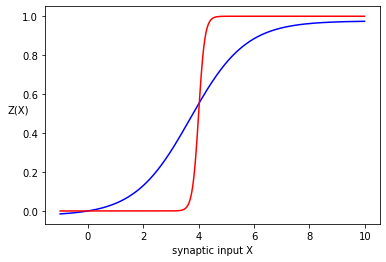

In [4]:
### SET THE ACTIVATION FUNCTION AND FIND MAX RESPONSE

def max_slope(x):
    grad = np.gradient(x, s)
    y = np.where(np.amax(grad) == grad)
    return(y[0][0])

values = "Thesis"     # Thesis or WC

s = 0.01
if values == "WC":
    max_syn = 9.0
elif values == "Thesis":
    max_syn = 10.0
    
IE = np.arange(-1,max_syn,s)
ZI, ZE = [], []
for I in IE:
    ZI.append(Z(I,"i"))
for E in IE:
    ZE.append(Z(E,"e"))
plt.plot(IE, ZI, "b", IE, ZE, "r")
plt.xlabel("synaptic input X")
plt.ylabel("Z(X)", rotation=0)

ke, ki = np.amax(ZE), np.amax(ZI)

print("Max slopes (expected): \n E: {} \n I: {}".format(4.0/4, 3.7/4))
print("***************")
print("Max slopes (calculated) \n E: {} \n I: {}".format(np.amax(np.gradient(ZE, s)), 
                                                         np.amax(np.gradient(ZI, s))))
print("***************")
print("Max slope position: \n xe: {} \n xi: {}".format(IE[max_slope(ZE)], IE[max_slope(ZI)]))
print("***************")
print("Max responce: \n ke: {} \n ki: {}".format(ke, ki))

/Users/erinbjorkeli/anaconda3/envs/nestenv/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log


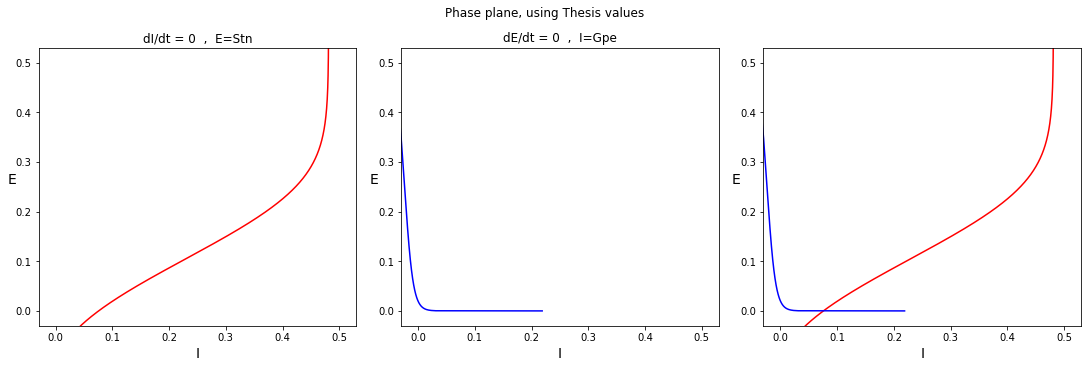

In [5]:
### PLOTTING THE NULLCLINES FOR STN AND GPE LOOP
# E = STN, I = GPe


ds = 0.0001
IE = np.arange(-0.1, 0.5+ds, ds)
l = len(IE)

Es, Is = [], []

# C1 - Stn-Stn ; C2 - Gpe-Stn ; C3 - Stn-Gpe ; C4 - Gpe-Gpe ; C5 - D2-Gpe ; C6 - Ctx-Stn

# No STN-intraconnection
c1, c2, c3, c4 = 0, 15., 20., 4.5
c5, c6 = 4.5, 8.5

# Low STN-intraconnection
#c1, c2, c3, c4 = 2.6, 12., 18., 4.5
#c5, c6 = 4.5, 10.0

Cx_, D2_ = 0.42, 0.43

# FINDING E (dI/dt=0)
for e, E in enumerate(IE):
    ze = Z_inv(E/(ke - E), "e")
    I_ = (-ze + c1*E + c6*Cx_) / c2
    Is.append(I_)    

# FINDING I (dE/dt=0)
for i, I in enumerate(IE):
    zi = Z_inv(I/(ki - I), "i")
    E_ = (zi + c4*I - c5*D2_) / c3
    Es.append(E_)


fig, axs = plt.subplots(1, 3, figsize=(15,5), constrained_layout=True)
plt.suptitle("Phase plane, using {} values".format(values))
axs[0].plot(IE, Es, "r")
axs[0].set_title("dI/dt = 0  ,  E=Stn")
axs[0].set_xlabel("I", fontsize=14)
axs[0].set_ylabel("E", rotation=0, fontsize=14)
axs[1].plot(Is, IE, "b")
axs[1].set_title("dE/dt = 0  ,  I=Gpe")
axs[1].set_xlabel("I", fontsize=14)
axs[1].set_ylabel("E", rotation=0, fontsize=14)

if ds > 0.005:
    [X,Y] = meshgrid(IE,IE);
    axs[2].plot(IE, Es, "r", Is, IE, "b")
    axs[2].quiver(X, Y, Es, Is, units='width', scale=8)
    axs[2].set_xlabel("I", fontsize=14)
    axs[2].set_ylabel("E", rotation=0, fontsize=14)
else:
    axs[2].plot(IE, Es, "r", Is, IE, "b")
    axs[2].set_xlabel("I", fontsize=14)
    axs[2].set_ylabel("E", rotation=0, fontsize=14)

for i in range(3):
    axs[i].set_xlim([-0.03, 0.53])
    axs[i].set_ylim([-0.03, 0.53])

#x, y = intersection(IE, Es, Is, IE)
#idx = [x,y]
#plt.plot(x,y, 'ko')

plt.show()

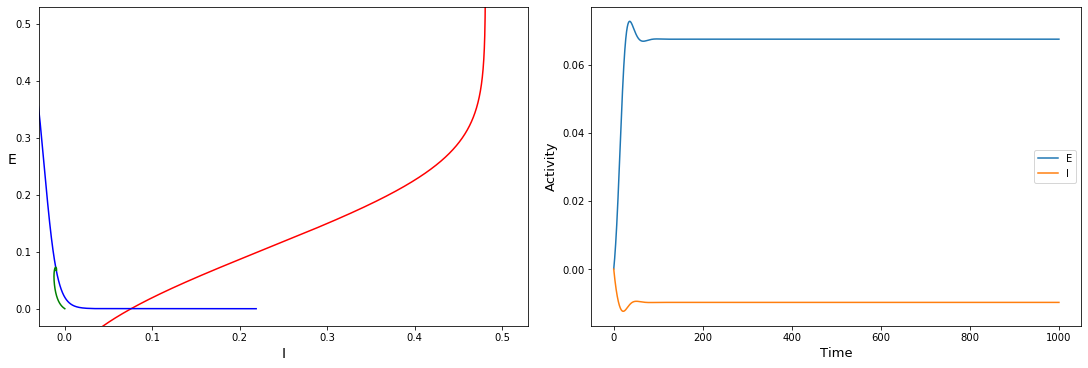

In [6]:


dt = 0.01 
simtime = 1000.0 #ms
timestep = int(simtime/dt)
timevec = np.arange(timestep)
Tau = 15.

E_Stn, I_Gpe = np.zeros(timestep), np.zeros(timestep)

for t in range(1,timestep):
    w_Stn, w_Gpe = c1, c4
    w_StnGpe, w_GpeStn = c3, c2
    w_CxStn, w_D2Gpe = c6, c5
    
    E_Cx, I_D2 = Cx_, D2_
    
    # To STN:
    syn = w_Stn*E_Stn[t-1] + w_CxStn*E_Cx - w_GpeStn*I_Gpe[t-1]
    dE_Stn = (-E_Stn[t-1] + (ke-E_Stn[t-1]) * Z(syn,"e")) / Tau

    # To GPe:
    syn = - w_Gpe*I_Gpe[t-1] - w_D2Gpe*I_D2 + w_StnGpe*E_Stn[t-1]
    dI_Gpe = (-I_Gpe[t-1] + (ki-I_Gpe[t-1]) * Z(syn,"i")) / Tau

    ###
    E_Stn[t] = E_Stn[t-1] + (dE_Stn * dt)
    I_Gpe[t] = I_Gpe[t-1] + (dI_Gpe * dt)

fig, axs = plt.subplots(1, 2, figsize=(15,5), constrained_layout=True)
axs[0].plot(IE, Es, "r", Is, IE, "b")
axs[0].plot(I_Gpe, E_Stn, "g")
axs[0].set_xlim([-0.03, 0.53])
axs[0].set_ylim([-0.03, 0.53])
axs[0].set_xlabel("I", fontsize=14)
axs[0].set_ylabel("E", fontsize=14, rotation=0)

axs[1].plot(timevec*dt, E_Stn, label="E")
axs[1].plot(timevec*dt, I_Gpe, label="I")
axs[1].set_xlabel("Time", fontsize=13)
axs[1].set_ylabel("Activity", fontsize=13)
plt.legend()

For conditions to be fulfilled the dot should be within the yellow domain.
   
In domain: False


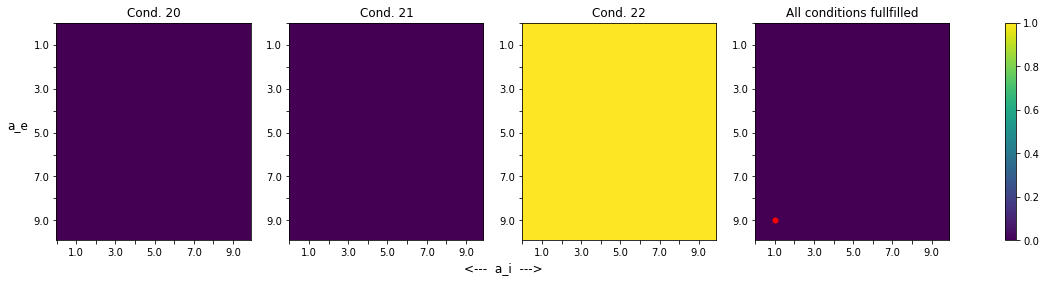

In [7]:
### TEST CRITERIA FOR POSSIBLE OSCILLATIONS

da = 0.01
a_e, a_i = np.arange(0.1,10,da), np.arange(0.1,10,da)
size = len(a_e)

cond_20, cond_21, cond_22 = np.zeros((size,size)), np.zeros((size,size)), np.zeros((size,size))
for i, ae in enumerate(a_e):
    for j, ai in enumerate(a_i): 
        cond_20[i,j] = (c1 * ae > c4 * ai + 18)
        
        cond_21_0 = (c2 * ae) / (c1 * ae - 9)
        cond_21_1 = (c4 * ai + 9) / (c3 * ai)
        cond_21[i,j] = (cond_21_0 > cond_21_1)

        cond_22[i,j] = (1/cond_21_0 < 1)  #((c1 * ae - 9) / (c2 * ae) < 1)

fig, axs = plt.subplots(1, 4, figsize=(20,4))
axs = axs.flatten()

im = axs[0].imshow(cond_20, vmin=0, vmax=1, aspect="auto")
axs[0].set_title("Cond. 20")

im = axs[1].imshow(cond_21, vmin=0, vmax=1, aspect="auto")
axs[1].set_title("Cond. 21")

im = axs[2].imshow(cond_22, vmin=0, vmax=1, aspect="auto")
axs[2].set_title("Cond. 22")

#x, y = int(1.3/da)-1, int(2.0/da)-1   # Wilson Cowan
x, y = int(9.0/da)-1, int(1.0/da)-1    # Fitted sigmoid

cond = cond_20*cond_21*cond_22
im = axs[3].imshow(cond, vmin=0, vmax=1, aspect="auto")
axs[3].scatter(y, x, s=25, c='red', marker='o')
axs[3].set_title("All conditions fullfilled")

for i in range(4):
    axs[i].set_xticks(np.arange(0,size,1/da*1)) 
    axs[i].set_xticklabels((np.arange(0,size*da,1)))
    axs[i].set_yticks(np.arange(0,size,1/da*1)) 
    axs[i].set_yticklabels((np.arange(0,size*da,1)))
    for label in axs[i].get_xticklabels()[::2]:
        label.set_visible(False)
    for label in axs[i].get_yticklabels()[::2]:
        label.set_visible(False)
axs[1].set_xlabel("<---  a_i  --->", fontsize=12)
axs[1].xaxis.set_label_coords(1.1, -0.1)
axs[0].set_ylabel("a_e", rotation=0, fontsize=12)
axs[0].yaxis.set_label_coords(-0.2, 0.5)

fig.colorbar(im, ax=axs.ravel().tolist())
print("For conditions to be fulfilled the dot should be within the yellow domain.")
print("   ")
print("In domain: {}".format(str(cond[x,y]==1)))
plt.show() 

## Set up and run the model

In [8]:
def brain_stim(freq, phase, amp, t_start=300.0, simtime=1000.0, dt=0.01):
    timevec = np.arange(int(simtime/dt))
    stim = np.zeros(len(timevec))
    stim = amp * np.sin(2 * np.pi * freq/1000 * timevec*dt + phase)
    stim[:int(t_start/dt)] = 0
    return(stim)

def freq_analysis(z, f=200):
    A = np.fft.fft(z, axis=0)
    fft = np.abs(A)
    df = 1 / (1000/dt)
    freq = np.fft.fftfreq(z.size, d=df)
    return(freq[range(int(z.size/2))], fft[range(int(z.size/2))])

def filter_fft(freq, fft, max_f=200):
    freq_ = np.arange(max_f+1)
    fft_ = np.zeros(len(freq_))
    for i in range(len(freq)):
        idx = int(freq[i])
        fft_[idx] += fft[i]
    return(freq_, fft_)

def beta_peak(fft,freq):
    "Returns peak frequency within the beta band."
    fft = (np.array(fft))
    beta = np.where((freq>12)&(freq<30))   #nb: 13-30 isteden for 12-30...
    idx = np.where(fft==np.amax(fft[beta]))
    peak = freq[idx][0]
    return(peak, np.round(peak))

In [9]:
## NORMAL VALUES:

p = {'Tau_e': 13.5,   #ms
     'Tau_i': 13.5,   #ms
     'w_ThmCx': 5.0, 
     'w_CxD1': 8.0, 
     'w_CxD2': 13.,    # 13.0 PD, 4.0 Healthy
     'w_CxStn': c6, 
     'w_D2Gpe': c5, 
     'w_D2D1': 6.0, 
     'w_D1D2': 2.0, 
     'w_GpeStn': c2, 
     'w_StnGpe': c3, 
     'w_StnGpi': 20.0, 
     'w_D1Gpi': 5.0, 
     'w_GpeGpi': 3.0, 
     'w_GpiThm': 5.0,  # Open vs closed circuit
     'w_Stn': 0.0, 
     'w_Gpe': c4, 
     'ext_1': 4.0, 
     'ext_2': 3.9}

In [10]:
Tau_e = p["Tau_e"]
Tau_i = p["Tau_i"]
dt = 0.01 
simtime = 1000.0
timestep = int(simtime/dt)
timevec = np.arange(timestep)

E_Cx = np.zeros(timestep)
I_D1 = np.zeros(timestep)
I_D2 = np.zeros(timestep)
E_Stn = np.zeros(timestep)
I_Gpe = np.zeros(timestep)
I_Gpi = np.zeros(timestep)
E_Thm = np.zeros(timestep)


DBS = np.zeros(timestep)
TCS = np.zeros(timestep)
# Turn on stimulation:
#DBS = brain_stim(130, 0, 0.5, 300.0, simtime, dt)
#TCS = brain_stim(130, 0, 0.5, 300.0, simtime, dt)

noise_1 = np.random.normal(0,1,timestep) * 0.0
noise_2 = np.random.normal(0,1,timestep) * 0.0

# External input to Cortex and Thalamus:
ext_1 = np.ones(timestep) * p["ext_1"] + noise_1
ext_2 = np.ones(timestep) * p["ext_2"] + noise_2

# Connection between populations:
w_ThmCx = p["w_ThmCx"]
w_CxD1 = p["w_CxD1"] 
w_CxD2 = p["w_CxD2"]
w_CxStn = p["w_CxStn"]
w_D2Gpe = p["w_D2Gpe"]
w_D2D1 = p["w_D2D1"]
w_D1D2 = p["w_D1D2"]
w_GpeStn = p["w_GpeStn"]
w_StnGpe = p["w_StnGpe"]
w_StnGpi = p["w_StnGpi"]
w_D1Gpi = p["w_D1Gpi"]
w_GpeGpi = p["w_GpeGpi"]
w_GpiThm = p["w_GpiThm"]
# Connections inside populaitons:
w_Stn = p["w_Stn"]
w_Gpe = p["w_Gpe"]


for t in range(1,timestep):
    # To cortex:
    syn = w_ThmCx*E_Thm[t-1] + TCS[t-1] + ext_1[t-1]
    dE_Cx = (-E_Cx[t-1] + (ke-E_Cx[t-1]) * Z(syn,"e")) / Tau_e 

    # To D1:
    syn = w_CxD1*E_Cx[t-1] - w_D2D1*I_D2[t-1]
    dI_D1 = (-I_D1[t-1] + (ki-I_D1[t-1]) * Z(syn,"i")) / Tau_i

    # To D2:
    syn = w_CxD2*E_Cx[t-1] - w_D1D2*I_D1[t-1]
    dI_D2 = (-I_D2[t-1] + (ki-I_D2[t-1]) * Z(syn,"i")) / Tau_i

    # To STN:
    syn = w_Stn*E_Stn[t-1] + w_CxStn*E_Cx[t-1] - w_GpeStn*I_Gpe[t-1] + DBS[t-1]
    dE_Stn = (-E_Stn[t-1] + (ke-E_Stn[t-1]) * Z(syn,"e")) / Tau_e
    # To GPe:
    syn = - w_Gpe*I_Gpe[t-1] - w_D2Gpe*I_D2[t-1] + w_StnGpe*E_Stn[t-1]
    dI_Gpe = (-I_Gpe[t-1] + (ki-I_Gpe[t-1]) * Z(syn,"i")) / Tau_i
    
    # To Gpi:
    syn = - w_D1Gpi*I_D1[t-1] - w_GpeGpi*I_Gpe[t-1] + w_StnGpi*E_Stn[t-1]
    dI_Gpi = (-I_Gpi[t-1] + (ki-I_Gpi[t-1]) * Z(syn,"i")) / Tau_i

    # To thalamus:
    syn = - w_GpiThm*I_Gpi[t-1] + ext_2[t-1]
    dE_Thm =(-E_Thm[t-1] + (ke-E_Thm[t-1]) * Z(syn,"e")) / Tau_e


    # Update values:
    E_Cx[t] = E_Cx[t-1] + (dE_Cx * dt)
    I_D1[t] = I_D1[t-1] + (dI_D1 * dt)
    I_D2[t] = I_D2[t-1] + (dI_D2 * dt)
    E_Stn[t] = E_Stn[t-1] + (dE_Stn * dt)
    I_Gpe[t] = I_Gpe[t-1] + (dI_Gpe * dt)
    I_Gpi[t] = I_Gpi[t-1] + (dI_Gpi * dt)
    E_Thm[t] = E_Thm[t-1] + (dE_Thm * dt)

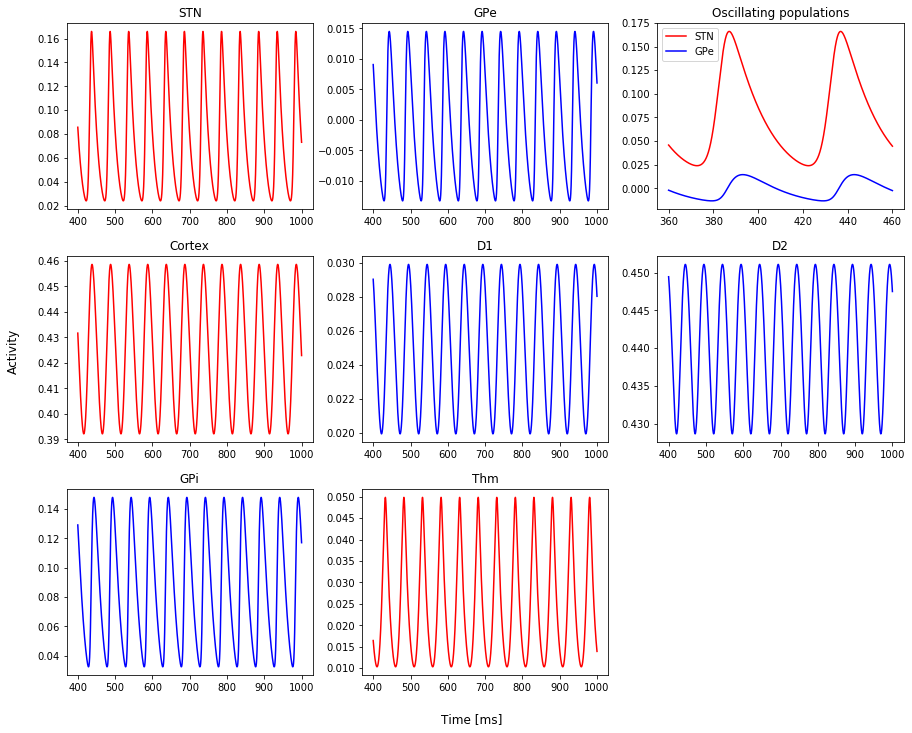

In [11]:
### PLOT THE ACTIVITY OF EACH POPULATION
# Red = excitatory population,  Blue = inhibitory population

fig = plt.figure(1, figsize=(15,12))
init = int(400/dt)

ax0 = plt.subplot(331)          # STN
ax0.plot(timevec[init:]*dt, E_Stn[init:], "r")
ax0.set_title("STN")

ax1 = plt.subplot(332)          # GPe
ax1.plot(timevec[init:]*dt, I_Gpe[init:], "b")
ax1.set_title("GPe")

ax3 = plt.subplot(334)          # Cortex
ax3.plot(timevec[init:]*dt, E_Cx[init:], "r")
ax3.set_title("Cortex")

ax4 = plt.subplot(335)         # D1
ax4.plot(timevec[init:]*dt, I_D1[init:], "b")
ax4.set_title("D1")

ax5 = plt.subplot(336)         # D2
ax5.plot(timevec[init:]*dt, I_D2[init:], "b")
ax5.set_title("D2")

ax6 = plt.subplot(337)         # GPi
ax6.plot(timevec[init:]*dt, I_Gpi[init:], "b")
ax6.set_title("GPi")

ax7 = plt.subplot(338)         # Thalamus
ax7.plot(timevec[init:]*dt, E_Thm[init:], "r")
ax7.set_title("Thm")


# Zoom in on STN and GPe
t1 = int(360/dt)
t2 = int(100/dt)
ax2 = plt.subplot(333)
ax2.plot(timevec[t1:t1+t2]*dt, E_Stn[t1:t1+t2], "r", label="STN")
ax2.plot(timevec[t1:t1+t2]*dt, I_Gpe[t1:t1+t2], "b", label="GPe")
ax2.set_title("Oscillating populations")

fig.text(0.5, 0.07, "Time [ms]", ha="center", fontsize=12)
fig.text(0.07, 0.5, "Activity", va="center", rotation="vertical", fontsize=12)
fig.subplots_adjust(hspace=.25)

plt.legend()

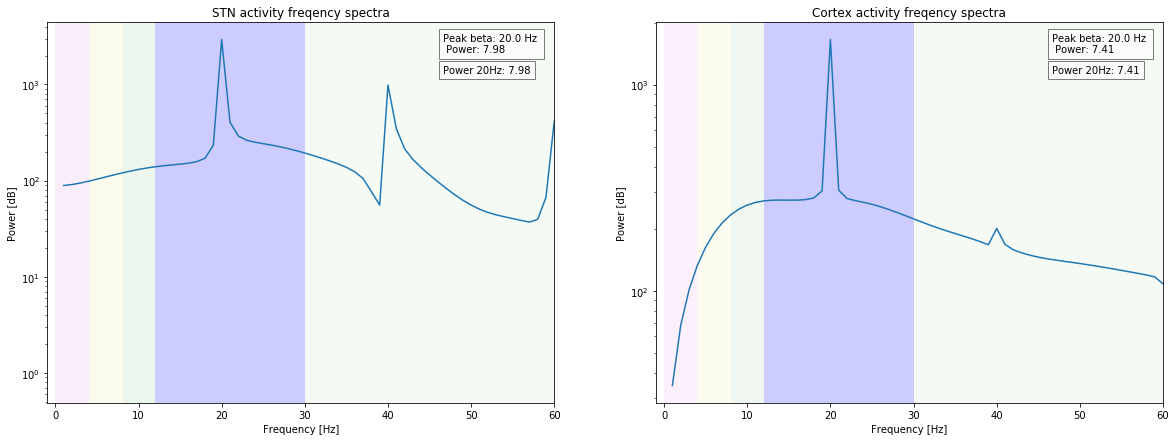

In [12]:
### PLOT THE FREQUENCY SPECTRA

freq_Stn, fft_Stn = freq_analysis(E_Stn)
peak_Stn, peak_int_Stn = beta_peak(fft_Stn,freq_Stn)
freq_Cx, fft_Cx = freq_analysis(E_Cx)
peak_Cx, peak_int_Cx = beta_peak(fft_Cx,freq_Cx)

fig = plt.figure(figsize=[20,7])
gs=GridSpec(1,2)
cut = 120

ax0 = subplot(gs[0], title="STN activity freqency spectra", xlabel="Frequency [Hz]" , ylabel="Power [dB]")
ax0.set_xlim(-1,cut/2)
ax0.semilogy(freq_Stn[1:cut], fft_Stn[1:cut])
plt.figtext(0.40, 0.82, "Peak beta: {} Hz \n Power: {:1.2f}".format(peak_Stn, np.log(fft_Stn[np.where(freq_Stn==peak_Stn)][0])),
           bbox=dict(facecolor='white', alpha=0.5))
plt.figtext(.40, .78, "Power 20Hz: {:1.2f}".format(np.log(fft_Stn[np.where(freq_Stn==20.0)][0])),
            bbox=dict(facecolor='white', alpha=0.5))
ax0.axvspan(0, 4, facecolor='m', alpha=0.07)    # delta
ax0.axvspan(4, 8, facecolor='y', alpha=0.07)    # theta
ax0.axvspan(8, 12, facecolor='g', alpha=0.07)   # alpha
ax0.axvspan(12, 30, facecolor='b', alpha=0.20)  # beta
ax0.axvspan(30, 140, facecolor='g', alpha=0.04) # gamma

ax1 = subplot(gs[1], title="Cortex activity freqency spectra", xlabel="Frequency [Hz]" , ylabel="Power [dB]")
ax1.set_xlim(-1,cut/2)
ax1.semilogy(freq_Cx[1:cut], fft_Cx[1:cut])
plt.figtext(0.823, 0.82, "Peak beta: {} Hz \n Power: {:1.2f}".format(peak_Cx, np.log(fft_Cx[np.where(freq_Cx==peak_Cx)][0])),
           bbox=dict(facecolor='white', alpha=0.5))
plt.figtext(.823, .78, "Power 20Hz: {:1.2f}".format(np.log(fft_Cx[np.where(freq_Cx==20.0)][0])),
            bbox=dict(facecolor='white', alpha=0.5))
ax1.axvspan(0, 4, facecolor='m', alpha=0.06)    # delta
ax1.axvspan(4, 8, facecolor='y', alpha=0.06)    # theta
ax1.axvspan(8, 12, facecolor='g', alpha=0.06)   # alpha
ax1.axvspan(12, 30, facecolor='b', alpha=0.20)  # beta
ax1.axvspan(30, 140, facecolor='g', alpha=0.04) # gamma


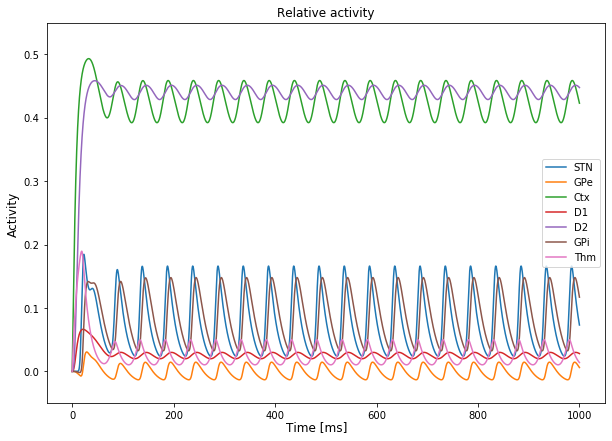

In [13]:
### PLOT ACTIVITY OF ALL POPULATIONS

fig = plt.figure(figsize=[10,7])

ax0 = plt.subplot(111)
ax0.plot(timevec*dt, E_Stn, label="STN")
ax0.set_title("Relative activity")

ax0.plot(timevec*dt, I_Gpe, label="GPe")

ax0.plot(timevec*dt, E_Cx, label="Ctx")

ax0.plot(timevec*dt, I_D1, label="D1")

ax0.plot(timevec*dt, I_D2, label="D2")

ax0.plot(timevec*dt, I_Gpi, label="GPi")

ax0.plot(timevec*dt, E_Thm, label="Thm")

ax0.set_ylim(-0.05,0.55)
fig.text(0.5, 0.07, "Time [ms]", ha="center", fontsize=12)
fig.text(0.07, 0.5, "Activity", va="center", rotation="vertical", fontsize=12)
plt.legend(loc="right")

Text(0, 0.5, 'Cortical activity')

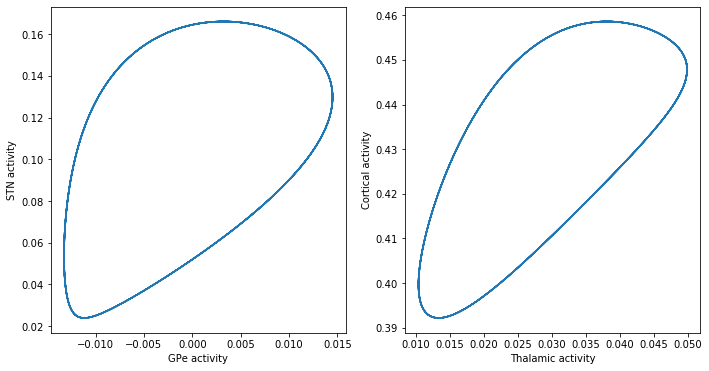

In [14]:
### PLOT LIMIT CYCLES

i, j = -25000, -1
plt.figure(1, figsize=(18,6))
lim = [0,0.5]

ax0 = plt.subplot(131)  
ax0.plot(I_Gpe[i:j], E_Stn[i:j])
ax0.set_xlabel("GPe activity")
ax0.set_ylabel("STN activity")

ax1 = plt.subplot(132)
ax1.plot(E_Thm[i:j], E_Cx[i:j])
ax1.set_xlabel("Thalamic activity")
ax1.set_ylabel("Cortical activity")